# What Makes a Great Board Game?

## Introduction
In this notebook, I will be exploring a dataset containing all board games and expansions showcased and rated in BoardGameGeek's website. I came across this dataset published by Gabriele Baldassarre on Kaggle, which you can find here: https://www.kaggle.com/gabrio/board-games-dataset

I will be using the CRISP-DM process to conduct my exploratory analysis. 

## Business Understanding
The goal of this analysis is to explore *what makes a great board game?* To do this, we will answer 3 business questions: 
1. What correlates to a board game's rating?
2. How does the quality of a board game change based on it's complexity?
3. Are complex board games considered popular? 

## Data Understanding

### Loading the Data
We will be using the pandas and matplotlib libraries to explore the data. We will also load the sqlite3 library to read the database and convert it into a pandas dataframe. 

In [1]:
#Load the libraries

import numpy as np 
import pandas as pd 
import sqlite3 # to read the database
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
#Load the Data
conn = sqlite3.connect(r'C:\Users\mitra\database.sqlite', uri=True)
df = pd.read_sql_query("SELECT * FROM BoardGames", conn)

#Verify that the result of SQL query is stored as a pandas DataFrame
df.head()

,row_names,game.id,game.type,details.description,details.image,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,...,stats.family.arcade.bayesaverage,stats.family.arcade.pos,stats.family.atarist.bayesaverage,stats.family.atarist.pos,stats.family.commodore64.bayesaverage,stats.family.commodore64.pos,stats.subtype.rpgitem.bayesaverage,stats.subtype.rpgitem.pos,stats.subtype.videogame.bayesaverage,stats.subtype.videogame.pos
0,1,1,boardgame,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5.0,240.0,14.0,3.0,240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,boardgame,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4.0,30.0,12.0,3.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,boardgame,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4.0,60.0,10.0,2.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,boardgame,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4.0,60.0,12.0,2.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,boardgame,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6.0,90.0,12.0,3.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#View the shape of the original dataset
print(df.shape)

(90400, 81)


## Data Preperation
The original dataset has over 90000 rows and 81 columns, that's definitely a lot! 

First, we are going to filter out board games and board game expansions that have 10 or less total ratings. This helps to clean the data as well as filter out homebrew content, variant gameplays and forgettable board games in general.  

We will then remove the null values in our most important stat - the board game rating i.e. 'stats.average'. After that, we will remove the columns that are not necessary for our exploratory analysis as well as null columns. 

Particularly, we will filter out boardgame entries only and then remove the 'game.type' column, as we only want to explore board games and not their expansions. We can assume that the expansion is dependent on its original, and hence is a biased column. 

In [4]:
#Remove the null ratings in the dataset
cleaned_df = df[df['stats.average']> 0.0]
#Remove the entries with 5 or less total user ratings
cleaned_df = cleaned_df[cleaned_df['stats.usersrated']>10.0]
#Filter the dataset to only contain board games
cleaned_df = cleaned_df[cleaned_df['game.type']=='boardgame']
#Remove all the unnecessary columns and null columns 
cleaned_df = cleaned_df.drop(['row_names','details.description','details.image','details.thumbnail',
                         'attributes.boardgamecompilation', 'attributes.boardgameexpansion', 'attributes.boardgamefamily',
                          'attributes.boardgameimplementation', 'attributes.boardgameintegration', 
                          'polls.language_dependence', 'polls.suggested_numplayers.1',
       'polls.suggested_numplayers.10', 'polls.suggested_numplayers.2',
       'polls.suggested_numplayers.3', 'polls.suggested_numplayers.4',
       'polls.suggested_numplayers.5', 'polls.suggested_numplayers.6',
       'polls.suggested_numplayers.7', 'polls.suggested_numplayers.8',
       'polls.suggested_numplayers.9', 'polls.suggested_numplayers.Over',
       'polls.suggested_playerage', 'attributes.t.links.concat.2....',
       'stats.family.amiga.bayesaverage', 'stats.family.amiga.pos',
       'stats.family.arcade.bayesaverage', 'stats.family.arcade.pos',
       'stats.family.atarist.bayesaverage', 'stats.family.atarist.pos',
       'stats.family.commodore64.bayesaverage', 'stats.family.commodore64.pos',
       'stats.subtype.rpgitem.bayesaverage', 'stats.subtype.rpgitem.pos',
       'stats.subtype.videogame.bayesaverage', 'stats.subtype.videogame.pos', 'stats.numcomments',
       'stats.numweights', 'stats.stddev',
       'stats.subtype.boardgame.bayesaverage', 'stats.subtype.boardgame.pos',
       'stats.trading', 'stats.wanting', 'stats.wishing', 'stats.family.abstracts.bayesaverage',
                         'stats.family.abstracts.pos', 'stats.family.cgs.bayesaverage', 'stats.family.cgs.pos',
                          'stats.family.childrensgames.bayesaverage' , 'stats.family.childrensgames.pos',
                          'stats.family.familygames.bayesaverage','stats.family.familygames.pos',
                          'stats.family.partygames.bayesaverage','stats.family.partygames.pos',
                          'stats.family.strategygames.bayesaverage' , 
                          'stats.family.strategygames.pos','stats.family.thematic.bayesaverage',
                          'stats.family.thematic.pos','stats.family.wargames.bayesaverage','stats.family.wargames.pos',
                         'attributes.boardgameartist', 'stats.median', 'attributes.total', 'stats.bayesaverage', 'game.type'], axis = 1)
cleaned_df.head()

,game.id,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,details.name,details.playingtime,details.yearpublished,attributes.boardgamecategory,attributes.boardgamedesigner,attributes.boardgamemechanic,attributes.boardgamepublisher,stats.average,stats.averageweight,stats.owned,stats.usersrated
0,1,5.0,240.0,14.0,3.0,240.0,Die Macher,240.0,1986.0,"Economic,Negotiation,Political",Karl-Heinz Schmiel,"Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4.3477,5251.0,4498.0
1,2,4.0,30.0,12.0,3.0,30.0,Dragonmaster,30.0,1981.0,"Card Game,Fantasy","G. W. ""Jerry"" D'Arcey",Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,1.9423,1053.0,478.0
2,3,4.0,60.0,10.0,2.0,30.0,Samurai,60.0,1998.0,"Abstract Strategy,Medieval",Reiner Knizia,"Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,2.5085,11870.0,12019.0
3,4,4.0,60.0,12.0,2.0,60.0,Tal der Könige,60.0,1992.0,Ancient,Christian Beierer,"Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,2.6667,523.0,314.0
4,5,6.0,90.0,12.0,3.0,90.0,Acquire,90.0,1964.0,Economic,Sid Sackson,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,2.5089,18682.0,15195.0


In [5]:
#View the shape of the cleaned dataset
print(cleaned_df.shape)

(21325, 17)


In [6]:
#View the proportions of null values in the cleaned dataset 
def get_nulls(cleaned_df): 
    '''
    INPUT:
    cleaned_df - the pandas dataframe I want to search
    col - the column name I want to look through and count values from

    OUTPUT:
    get_nulls - a list of the proportion of null values for each column 
    '''
    for col in cleaned_df.columns:
        print("proportion of null values of",col,"-",cleaned_df[col].isnull().mean())
    return

get_nulls(cleaned_df)

proportion of null values of game.id - 0.0
proportion of null values of details.maxplayers - 9.378663540445487e-05
proportion of null values of details.maxplaytime - 9.378663540445487e-05
proportion of null values of details.minage - 9.378663540445487e-05
proportion of null values of details.minplayers - 9.378663540445487e-05
proportion of null values of details.minplaytime - 9.378663540445487e-05
proportion of null values of details.name - 0.0
proportion of null values of details.playingtime - 9.378663540445487e-05
proportion of null values of details.yearpublished - 9.378663540445487e-05
proportion of null values of attributes.boardgamecategory - 0.011207502930832357
proportion of null values of attributes.boardgamedesigner - 0.026963657678780773
proportion of null values of attributes.boardgamemechanic - 0.12337631887456038
proportion of null values of attributes.boardgamepublisher - 0.00023446658851113716
proportion of null values of stats.average - 0.0
proportion of null values of

Looking at the proportions of null values in the cleaned dataset, we can see that the attribute columns have the most null values (albeit not many), while the detail columns have very few missing values. On the other hand, the *stats and game name columns* have no missing values, which are ultimately our most important columns for this dataset. 

Therefore, we will not be dropping any more rows or columns from this dataset, but we will be imputing values using the mode. As the attribute columns are strings, we will not be imputing or removing their missing values.

We will also be renaming some columns for ease of analysis. 

In [7]:
#Rename some columns for ease of analysis 
cleaned_df = cleaned_df.rename(columns = {"stats.average":"average rating", "stats.averageweight":"game complexity", 
                                          "stats.owned":"total owners", "stats.usersrated":"total ratings",
                                         "details.name":"game name"})
cleaned_df.head()

,game.id,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,game name,details.playingtime,details.yearpublished,attributes.boardgamecategory,attributes.boardgamedesigner,attributes.boardgamemechanic,attributes.boardgamepublisher,average rating,game complexity,total owners,total ratings
0,1,5.0,240.0,14.0,3.0,240.0,Die Macher,240.0,1986.0,"Economic,Negotiation,Political",Karl-Heinz Schmiel,"Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4.3477,5251.0,4498.0
1,2,4.0,30.0,12.0,3.0,30.0,Dragonmaster,30.0,1981.0,"Card Game,Fantasy","G. W. ""Jerry"" D'Arcey",Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,1.9423,1053.0,478.0
2,3,4.0,60.0,10.0,2.0,30.0,Samurai,60.0,1998.0,"Abstract Strategy,Medieval",Reiner Knizia,"Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,2.5085,11870.0,12019.0
3,4,4.0,60.0,12.0,2.0,60.0,Tal der Könige,60.0,1992.0,Ancient,Christian Beierer,"Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,2.6667,523.0,314.0
4,5,6.0,90.0,12.0,3.0,90.0,Acquire,90.0,1964.0,Economic,Sid Sackson,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,2.5089,18682.0,15195.0


In [8]:
#Impute all missing values in the dataset using the mode of each column 
def fill_na(cleaned_df): 
    '''
    INPUT:
    cleaned_df - the pandas dataframe I want to search
    col - the column name I want to look through and count values from

    OUTPUT:
    fill_na - a function that fills the null values of each column with its respective mode 
    '''
    for col in cleaned_df.columns:
        new_cleaned_df = cleaned_df[col].fillna(cleaned_df[col].mode()[0],inplace = True)
    return 
fill_na(cleaned_df)

#Check that all missing values have been imputed with the mode
cleaned_df.isnull().mean()

game.id                          0.0
details.maxplayers               0.0
details.maxplaytime              0.0
details.minage                   0.0
details.minplayers               0.0
details.minplaytime              0.0
game name                        0.0
details.playingtime              0.0
details.yearpublished            0.0
attributes.boardgamecategory     0.0
attributes.boardgamedesigner     0.0
attributes.boardgamemechanic     0.0
attributes.boardgamepublisher    0.0
average rating                   0.0
game complexity                  0.0
total owners                     0.0
total ratings                    0.0
dtype: float64

## Introduction to the Data: The Reign of Board Games 
Before we delve further into the data's features and particular business questions, we are going to explore how board games and its popularity progressed over the last 50 years. We will also explore the average rating distribution of board games in this dataset.

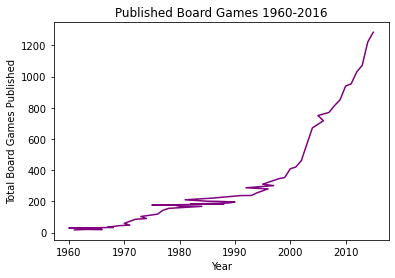

In [9]:
#View the trend line graph of published board games over the last 50 years 
rslt_df = cleaned_df[cleaned_df['details.yearpublished']> 1959.0]
rslt_df = rslt_df[rslt_df['details.yearpublished']<2016.0]
timeline_df = rslt_df['details.yearpublished'].value_counts()
timeline_df.plot(kind = 'line', color = 'purple', xlabel="Year", ylabel="Total Board Games Published", 
                      title = "Published Board Games 1960-2016");

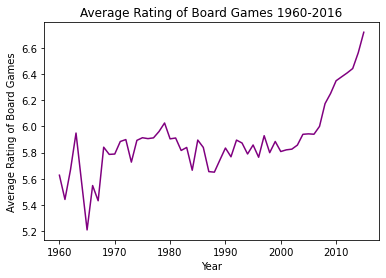

In [10]:
#View the trend line graph of the average rating of published board games over the last 50 years 
rate_df = rslt_df.groupby('details.yearpublished').mean()['average rating']
rate_df.plot(kind = 'line', color = 'purple', xlabel="Year", ylabel="Average Rating of Board Games", 
                      title = "Average Rating of Board Games 1960-2016");

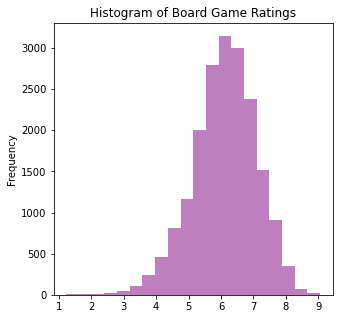

In [11]:
#View the histogram of average board game ratings over the last 50 years
fig, ax = plt.subplots(figsize=(5,5))
rating_df = rslt_df['average rating']
rating_df.plot(kind = 'hist', alpha=0.5, bins=20, color = 'purple', title = 'Histogram of Board Game Ratings');

## 1. What Correlates to a Board Game's Rating? 
In this section, we will explore a correlation heatmap that looks into the features of this dataset and how they are correlated. We particularly want to look at the average rating feature, but also analyse other striking visuals in this plot. 

In this case, we filter the dataset to have more than a 100 ratings in total. This is to create a more unbiased sample, as some of these columns are estimated entries inputted by the BoardGameGeek community. 

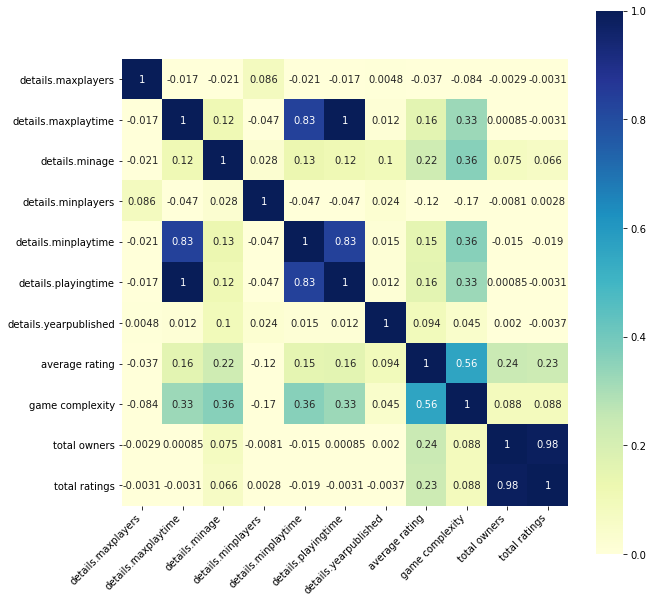

In [12]:
corr_df = cleaned_df[cleaned_df['total ratings']> 100.0]
corr = corr_df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=0, vmax=1, center=0.5,
    cmap="YlGnBu",
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## 2. How Does a Game's Complexity Affect its Rating? 
Based on the findings from the previous section, we will now explore the average rating of games based on their respective complexity through a scatter plot.

We will filter out board games that do not have a complexity score tied to them, as this is most probably caused by an absense of information on the website itself. 

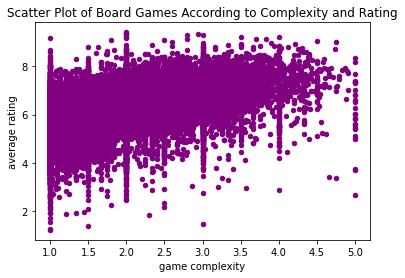

In [14]:
#View the scatter plot of the average ratings of board games against their respective complexity score.
complexity_df = cleaned_df[cleaned_df['game complexity']> 0.0]
complexity_df.plot(kind = 'scatter', x='game complexity', y='average rating', color = 'purple',
                title = "Scatter Plot of Board Games According to Complexity and Rating");


## 3. Is a Complex Game Considered Popular? 
We have seen a high correlation in the complexity of a board game towards the average rating, and we have seen a slight correlation in the total number of owners towards the average rating. 

In our final question, we will explore if a popular game is a highly rated game or not, and what the correlation is between complexity and popularity. Do they go hand in hand in making a great board game? Or does one feature triumph over the other in importance? 

In this section, we will be creating a new calculation to measure popularity, which is: (Average Rating)x(Total Ratings). This gives us the popularity score which we will explore with game complexity. 

In [15]:
#Create a new column called 'popularity score 
cleaned_df['popularity score'] = cleaned_df['average rating'] * cleaned_df['total ratings']
cleaned_df.head()

,game.id,details.maxplayers,details.maxplaytime,details.minage,details.minplayers,details.minplaytime,game name,details.playingtime,details.yearpublished,attributes.boardgamecategory,attributes.boardgamedesigner,attributes.boardgamemechanic,attributes.boardgamepublisher,average rating,game complexity,total owners,total ratings,popularity score
0,1,5.0,240.0,14.0,3.0,240.0,Die Macher,240.0,1986.0,"Economic,Negotiation,Political",Karl-Heinz Schmiel,"Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4.3477,5251.0,4498.0,34477.52984
1,2,4.0,30.0,12.0,3.0,30.0,Dragonmaster,30.0,1981.0,"Card Game,Fantasy","G. W. ""Jerry"" D'Arcey",Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,1.9423,1053.0,478.0,3158.69570
2,3,4.0,60.0,10.0,2.0,30.0,Samurai,60.0,1998.0,"Abstract Strategy,Medieval",Reiner Knizia,"Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,2.5085,11870.0,12019.0,89435.66261
3,4,4.0,60.0,12.0,2.0,60.0,Tal der Könige,60.0,1992.0,Ancient,Christian Beierer,"Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,2.6667,523.0,314.0,2074.51950
4,5,6.0,90.0,12.0,3.0,90.0,Acquire,90.0,1964.0,Economic,Sid Sackson,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,2.5089,18682.0,15195.0,111809.36850


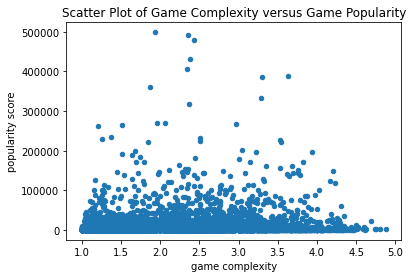

In [16]:
#Create a scatter plot on complexity versus popularity
pop_df = cleaned_df[cleaned_df['game complexity']> 0.0]
pop_df = pop_df[pop_df['total ratings']>100]
pop_df.plot(kind = 'scatter', x='game complexity', y='popularity score',
                title = "Scatter Plot of Game Complexity versus Game Popularity");